In [2]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from matplotlib import rcParams
from config_local import DATA_DIR

bbc and rt statistics
- article length
- time dist

al jazeera
- time dist

In [3]:
DATABASE_PATH = Path(DATA_DIR, "articles", "articles.db")
QUERY_BBC = """
    SELECT * 
    FROM bbc;
"""
QUERY_RT = """
    SELECT * 
    FROM rt;
"""
DATE_FORMAT = "%Y-%m-%d %H:%M:%S"

In [4]:
# read SQLite database
with sqlite3.connect(DATABASE_PATH) as con:
    
    bbc = pd.read_sql(QUERY_BBC, con)
    rt = pd.read_sql(QUERY_RT, con)

# fix datetime column
bbc.date_time = pd.to_datetime(bbc.date_text)
rt.date_time = pd.to_datetime(rt.date_text)
bbc.head()

,id,date_text,title,url,tags,content,text_prep,date_time,year_week
0,56008436,2021-02-10T09:28:40.000Z,Covid: Prince Charles and Camilla get first va...,https://www.bbc.com/news/uk-56008436,UK Royal Family;Coronavirus vaccines;Queen Cam...,The Prince of Wales and the Duchess of Cornwal...,prince wale duchess cornwall received vaccinat...,2021-02-10 09:28:40+00:00,2021-06
1,55895276,2021-02-02T08:14:34.000Z,Brexit: Animal-based food checks at ports susp...,https://www.bbc.com/news/uk-northern-ireland-5...,NI Brexit;Larne;Brexit,Checks on animal and food products at Larne an...,check animal food product larne belfast port s...,2021-02-02 08:14:34+00:00,2021-05
2,56126117,2021-02-19T15:14:22.000Z,Bloody Sunday: Family launch soldier prosecuti...,https://www.bbc.com/news/uk-northern-ireland-f...,Bloody Sunday;Londonderry-Derry,The family of a man shot dead on Bloody Sunday...,family man shot dead bloody sunday lodged lega...,2021-02-19 15:14:22+00:00,2021-07
3,55704289,2021-01-18T12:21:47.000Z,West Midlands photographers capture stunning s...,https://www.bbc.com/news/uk-england-birmingham...,Shrewsbury;Bromyard;Photography;Leek;Kingswinf...,There were colourful skies across the West Mid...,colourful sky across west midland monday morni...,2021-01-18 12:21:47+00:00,2021-03
4,56217647,2021-02-27T13:10:16.000Z,Brexit: DUP agriculture minister orders Brexit...,https://www.bbc.com/news/uk-northern-ireland-5...,NI Brexit;DUP (Democratic Unionist Party);Brexit,Northern Ireland's Democratic Unionist Party (...,northern ireland democratic unionist party dup...,2021-02-27 13:10:16+00:00,2021-08


In [5]:
bbc["word_count"] = bbc.content.str.split().apply(len)
rt["word_count"] = rt.content.str.split().apply(len)


In [6]:
aljazeera_urls_01 = pd.read_csv(Path(DATA_DIR, "mc_aljazeera_01082022_31122022.csv"))
aljazeera_urls_02 = pd.read_csv(Path(DATA_DIR, "mc_aljazeera_01012023_10032024.csv"))
aljazeera_urls = pd.concat([aljazeera_urls_01, aljazeera_urls_02])

aljazeera_urls["date_time"] = pd.to_datetime(aljazeera_urls.publish_date, format="mixed")


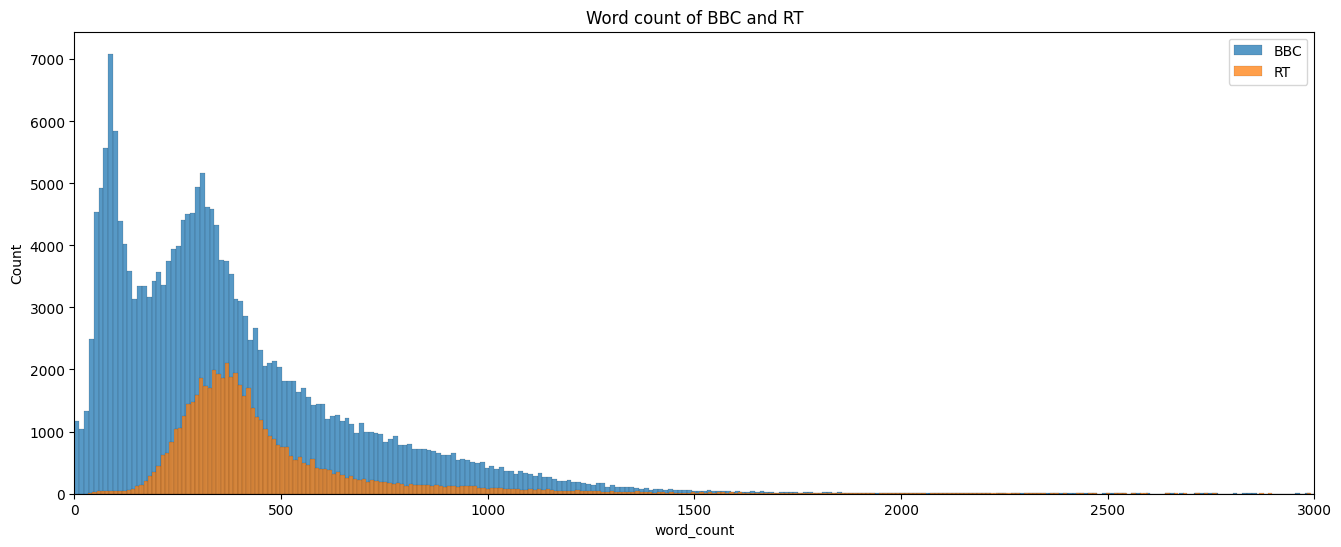

In [7]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.histplot(bbc, x="word_count", label="BBC")
sns.histplot(rt, x="word_count", label="RT")
ax.set_xlim((0, 3000))
plt.title("Word count of BBC and RT")
plt.legend()
plt.show()


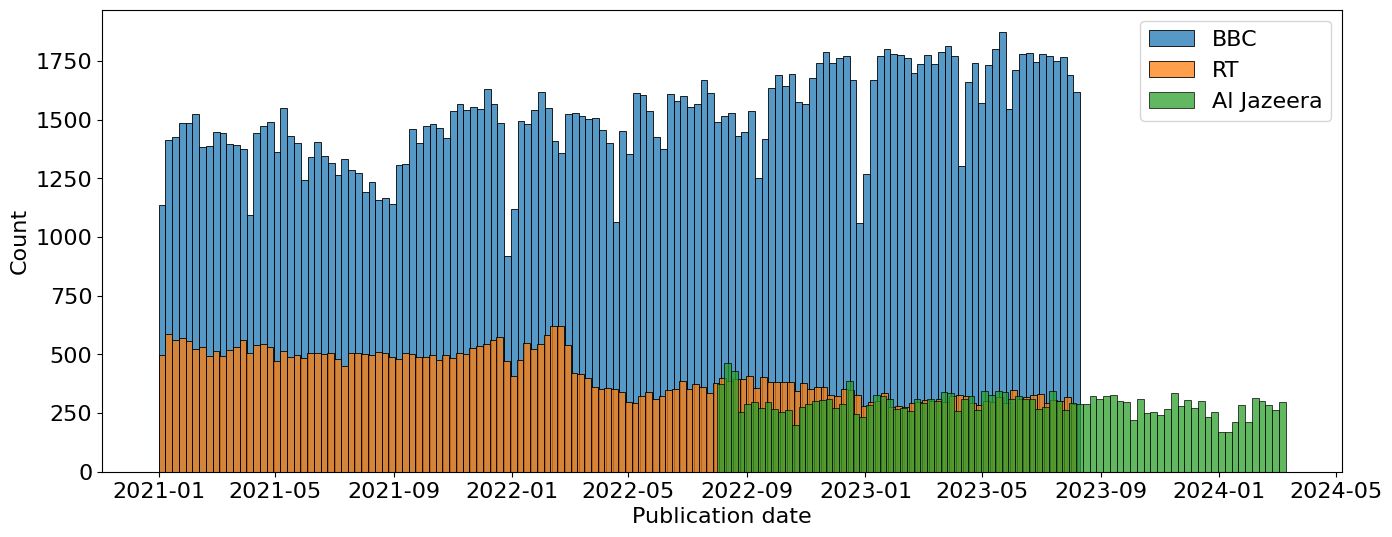

In [8]:
rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(16, 6))

sns.histplot(bbc, x="date_time", label="BBC", binwidth=7)
sns.histplot(rt, x="date_time", label="RT", binwidth=7)
sns.histplot(aljazeera_urls, x="date_time", label="Al Jazeera", binwidth=7)
plt.xlabel("Publication date")

# plt.title("Articles per week")
plt.legend()
plt.show()

In [9]:
print(f"Toal number of articles from BBC:\t {len(bbc)}")
print(f"Toal number of articles from RT:\t {len(rt)}")
print(f"Toal number of articles from AlJazeera:\t {len(aljazeera_urls)}")
print(f"Toal number of articles :\t\t {len(bbc) + len(rt) + len(aljazeera_urls)}")

Toal number of articles from BBC:	 205965
Toal number of articles from RT:	 56772
Toal number of articles from AlJazeera:	 24506
Toal number of articles :		 287243
